Supervised Learning
===
- Data Vector -> Classification
- Given the classifcations of a test set, can we determine the classification of a new data set?

### Perceptron
- Simple neural network based off of human neuron.
- Either fires or doesn't - binary classifier.
- Works by summing weighted inputs, subtracting a threshold, and looking at the sign of the result.

### Algorithm
1. Training set **x**, **y**
2. Classify all points in **x**
3. Choose a point *n* from **x** that was misclassified
4. Update weight vect **w** using **w** = **w** + **y**_n**x**_n
5. Repeat until all ae correct or until an upper limit of iteration is reached

Hint: Use enumerate() to iterate over list giving tuple of index, element.

In [2]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets

sbn.set()

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [37]:
class Perceptron:
    def __init__(self, ts, tc, verbose=True, plot=True):
        self.verbose = verbose
        self.training_set = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
        self.learn()
        if plot:
            self.plot()
        #self.describe()
        
    def classify(self, x):
        return np.sign(np.dot(x, self.weights))
    
    def learn(self, limit = 10000):
        done = False
        count = 0
        while not done and count < limit:
            count += 1
            self.correct = []
            self.incorrect = []
            # Classify every point
            for idx, i in enumerate(self.training_set):
                if self.classify(i) == self.classes[idx]:
                    self.correct.append(idx)
                else:
                    self.incorrect.append(idx)
            if len(self.incorrect) == 0:
                if self.verbose:
                    print('Done!', self.weights)
                done = True
            else:
                r = random.randrange(len(self.incorrect))
                y = self.training_set[self.incorrect[r]]
                self.weights = self.weights + y * self.classes[self.incorrect[r]]
                if self.verbose:
                    print(len(self.incorrect), self.weights)
            
    def plot(self):
        cols = []
        xvals = list(map(lambda x: x[1], self.training_set))
        cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals, list(map(lambda x: x[2], self.training_set)), c = cmap)
        slope, intcpt = -self.weights[1]/self.weights[2], -self.weights[0]/self.weights[2]
        xvals = np.linspace(min(xvals), max(xvals))
        plt.plot(xvals, slope * xvals + intcpt)
        
    def describe(self):
        print('Weights: ', self.weights)

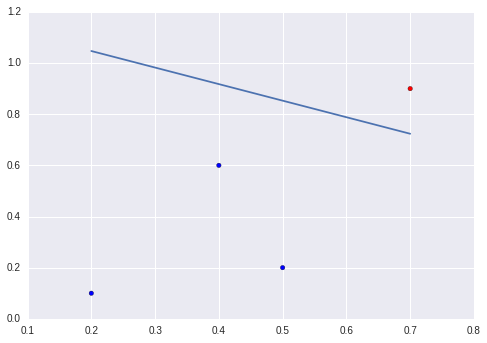

In [42]:
t1 = [np.array([1.3, 2.6, 3.7]), np.array([3.6, 2.1, 4.3]), np.array([2.5, 2.5, 2.5]), np.array([6.8, 2.2, 0.1])]
c1 = [1, -1, -1, 1]

t2 = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9])]
c2 = [1,1,1,-1]

p = Perceptron(t2, c2, verbose=False)

In [5]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

50 [-3.9 -2.1 -0.5  0.9]
99 [ 2.2  0.9  4.4  2.7]
50 [-3.5 -3.5  2.9  2.3]
99 [ 2.8 -1.   7.8  3.8]
50 [-2.  -4.1  6.2  3.6]
Done! [-2.  -4.1  6.2  3.6]


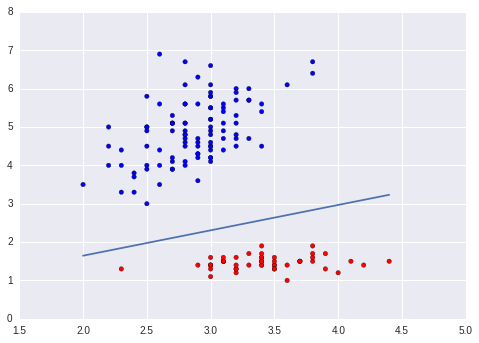

In [44]:
data_s = iris.iloc[0:149, [0, 1, 2, 3]].values
classes_s = iris.iloc[0:149, [4]].values
classes_s = np.where(classes_s == 'Iris-setosa', -1, 1)
s = Perceptron(data_s, classes_s)

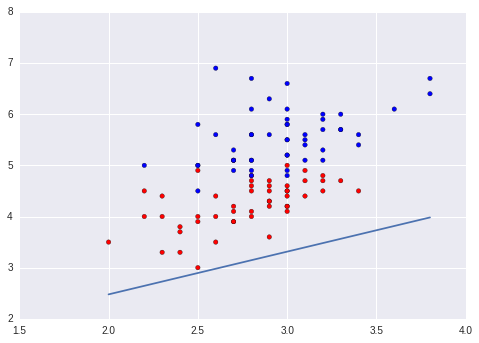

In [47]:
data_v = iris.iloc[50:149, [0, 1, 2, 3]].values
classes_v = iris.iloc[50:149, [4]].values
classes_v = np.where(classes_v == 'Iris-versicolor', -1, 1)
v = Perceptron(data_v, classes_v, verbose=False)

# Evaluation of the weights below suggests that the data is being separated appropriately, but the plot is wrong.

#### Choosing between *three* possibilities instead of two.

In [34]:
# Takes three arguments:
#  p    : A trained perceptron containing all data
#  s    : A trained perceptron containing data to be distunguished
#  data : A vector containing information for a single iris to be classified
def get_type(p, u, data):
    if p.classify(data) == -1:
        return 'Iris-setosa'
    else:
        if u.classify(data) == -1:
            return 'Iris-versicolor'
        else:
            return 'Iris-virginica'

In [181]:
print(get_type(s, v, iris.iloc[86, [0, 1, 2, 3]].values))    # Known versicolor
print(get_type(s, v, iris.iloc[37, [0, 1, 2, 3]].values))    # Known setosa
print(get_type(s, v, iris.iloc[108, [0, 1, 2, 3]].values))   # Known virginica
print(get_type(s, v, [4.5, 3.5, 2, 0.5]))                    # Unknown

Iris-versicolor
Iris-setosa
Iris-virginica
Iris-setosa


#### Run this cell to take a new sample and retrain the perceptrons.

In [198]:
# Get a sample with all types of iris for training
iris_training = iris.iloc[0:150, [0, 1, 2, 3]].sample(120)
iris_classes = iris.iloc[iris_training.index, [4]]

# Copy and trim down this sample to contain only versicolor and virginica
iris_training2 = iris_training[iris.loc[iris_training.index, 4] != 'Iris-setosa']
iris_classes2 = iris.iloc[iris_training2.index, [4]]

# Use the rest of the data to test the Perceptrons
iris_test = iris.iloc[0:150, [0, 1, 2, 3]].drop(iris_training.index)
iris_results = iris.iloc[iris_test.index, [4]]

# Create two perceptrons based on the training sets
setosa_p = Perceptron(iris_training.values, np.where(iris_classes.values == 'Iris-setosa', -1, 1), verbose = False, plot = False)
virginica_p = Perceptron(iris_training2.values, np.where(iris_classes2.values == 'Iris-versicolor', -1, 1), verbose=False, plot = False)

#### Run this cell to classify the remaining irises.

In [199]:
total = 0
correct = 0

for idx, i in enumerate(iris_test.values):
    total += 1
    if get_type(setosa_p, virginica_p, i) == iris_results.values[idx]:
        correct += 1
    #print("Values: " + str(i) + " -> " + get_type(setosa_p, virginica_p, i) + " ? " + iris_results.values[idx])

print("Correctly classified {0}% ({1} out of {2}) of the irises.".format(round(correct / total * 100), correct, total))

Correctly classified 97% (29 out of 30) of the irises.


### Using SciKit Learn

In [10]:
from sklearn.linear_model import Perceptron as PerceptronSK

In [30]:
data_s = iris.iloc[0:149, [0, 1, 2, 3]].values
classes_s = iris.iloc[0:149, [4]].values
classes_s = np.where(classes_s == 'Iris-setosa', -1, 1)
sks = PerceptronSK()
sks.fit(data_s, np.ravel(classes_s))

data_v = iris.iloc[50:149, [0, 1, 2, 3]].values
classes_v = iris.iloc[50:149, [4]].values
classes_v = np.where(classes_v == 'Iris-versicolor', -1, 1)
skv = PerceptronSK()
skv.fit(data_v, np.ravel(classes_v))

def get_type_sk(s, v, data):
    if s.predict(data) == -1:
        return 'Iris-setosa'
    else:
        if v.predict(data) == -1:
            return 'Iris-versicolor'
        else:
            return 'Iris-virginica'

In [183]:
print(get_type_sk(sks, skv, iris.iloc[86, [0, 1, 2, 3]].values))     # Known versicolor
print(get_type_sk(sks, skv, iris.iloc[37, [0, 1, 2, 3]].values))     # Known setosa
print(get_type_sk(sks, skv, iris.iloc[108, [0, 1, 2, 3]].values))    # Known virginica
print(get_type_sk(sks, skv, [4.5, 3.5, 2, 0.5]))                     # Unknown

Iris-versicolor
Iris-setosa
Iris-virginica
Iris-setosa
